In [412]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
#set ggplot style
# plt.style.use('ggplot')

In [413]:
joinselectivity = pd.read_csv('rawdata/join-selectivity.tsv', sep='\t')
kval = 'all'
# joinselectivity = joinselectivity[joinselectivity['size']== str(kval) + 'k_rows']
joinselectivity.head()

,tool,size,percent,type,totaltime,time-first,n# of results
0,rdfizer,01k_rows,5,high,1.83,1.37,2050
1,rmlmapper,01k_rows,5,high,1.62,1.62,2050
2,rdfizer,01k_rows,10,high,1.79,1.37,2100
3,rmlmapper,01k_rows,10,high,1.44,1.44,2100
4,rdfizer,01k_rows,20,high,1.92,1.40,2200


In [414]:
joinselectivity = joinselectivity[['tool', 'type', 'size', 'percent', 'totaltime']]
joinselectivity.head()

,tool,type,size,percent,totaltime
0,rdfizer,high,01k_rows,5,1.83
1,rmlmapper,high,01k_rows,5,1.62
2,rdfizer,high,01k_rows,10,1.79
3,rmlmapper,high,01k_rows,10,1.44
4,rdfizer,high,01k_rows,20,1.92


In [415]:
joinselectivity[(joinselectivity['type']=='high') & (joinselectivity['percent'].isin([20]))].shape

(8, 5)

In [416]:
c1 = joinselectivity[(
            (joinselectivity['percent'].isin([5, 10, 20])) & \
            (joinselectivity['type']=='high')
        )]
c1.head()

,tool,type,size,percent,totaltime
0,rdfizer,high,01k_rows,5,1.83
1,rmlmapper,high,01k_rows,5,1.62
2,rdfizer,high,01k_rows,10,1.79
3,rmlmapper,high,01k_rows,10,1.44
4,rdfizer,high,01k_rows,20,1.92


In [417]:
c1.shape

(24, 5)

In [418]:
c1 = c1.sort_values(by=['size', 'percent'])
c1 = c1.reset_index(drop=True)
c1

,tool,type,size,percent,totaltime
0,rdfizer,high,01k_rows,5,1.83
1,rmlmapper,high,01k_rows,5,1.62
2,rdfizer,high,01k_rows,10,1.79
3,rmlmapper,high,01k_rows,10,1.44
4,rdfizer,high,01k_rows,20,1.92
5,rmlmapper,high,01k_rows,20,1.71
6,rdfizer,high,03k_rows,5,1.96
7,rmlmapper,high,03k_rows,5,5.13
8,rdfizer,high,03k_rows,10,1.90
9,rmlmapper,high,03k_rows,10,5.17


## Config 2

In [419]:
c2 = joinselectivity[(
           (joinselectivity['percent'].isin([60, 80, 100])) & \
            (joinselectivity['type']=='low')
        )]
c2.head()

,tool,type,size,percent,totaltime
10,rdfizer,low,01k_rows,60,1.85
11,rmlmapper,low,01k_rows,60,1.51
12,rdfizer,low,01k_rows,80,1.87
13,rmlmapper,low,01k_rows,80,1.67
14,rdfizer,low,01k_rows,100,1.81


In [420]:
c2.shape

(24, 5)

In [421]:
c2 = c2.sort_values(by=['size', 'percent'])
c2 = c2.reset_index(drop=True)
c2.head()

,tool,type,size,percent,totaltime
0,rdfizer,low,01k_rows,60,1.85
1,rmlmapper,low,01k_rows,60,1.51
2,rdfizer,low,01k_rows,80,1.87
3,rmlmapper,low,01k_rows,80,1.67
4,rdfizer,low,01k_rows,100,1.81


In [422]:
import itertools
comb = list(itertools.permutations(list(range(1, 5)), 2))
comb.append((1,1))
comb.append((2,2))
comb.append((3,3))
comb.append((4,4))
comb = sorted(comb)

In [423]:
xydf = pd.DataFrame(comb, columns=['Configurations', 'Configuration'])
tools = ['rdfizer', 'rmlmapper']
configs = [c1, c2]
z = {'z': []}
colors = {'c': []}
for row in xydf.iterrows():
    ix = row[0]
    x = row[1][0]
    y = row[1][1]
    print(ix, x, y)
    xix = 0 if 4/x >= 2 else 1
    xtool = tools[xix]
    yix = 0 if 4/y >= 2 else 1
    ytool = tools[yix]
    
    xconfigix = 1 if x%2 == 0 else (x % 2 - 1)
    xconfig = configs[xconfigix]
    yconfigix = 1 if y%2 == 0 else (y % 2 - 1)
    yconfig = configs[yconfigix]
    
    v = np.corrcoef( xconfig[((xconfig['tool']== xtool))]['totaltime'],
                        yconfig[((yconfig['tool']==ytool))]['totaltime']
                    )[0, 1] 
    
    k = v
    if k > 0.999999999:
            c = "#e7eff6"            
    elif k < 0:
        c = '#fe4a49'
    else:
        c = '#03396c'
    colors['c'].append(c)
    z['z'].append(np.abs(v))

0 1 1
1 1 2
2 1 3
3 1 4
4 2 1
5 2 2
6 2 3
7 2 4
8 3 1
9 3 2
10 3 3
11 3 4
12 4 1
13 4 2
14 4 3
15 4 4


In [424]:
xydf['z'] = z['z']
xydf

,Configurations,Configuration,z
0,1,1,1.000000
1,1,2,0.989336
2,1,3,0.983678
3,1,4,0.975658
4,2,1,0.989336
5,2,2,1.000000
6,2,3,0.987200
7,2,4,0.987092
8,3,1,0.983678
9,3,2,0.987200


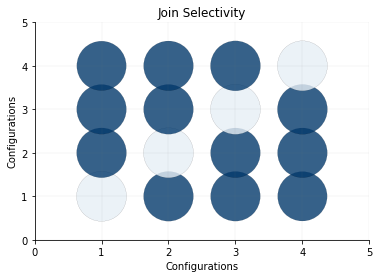

In [425]:
colors = pd.DataFrame(colors)
ploto = xydf.plot.scatter('Configurations', 'Configuration', s=xydf.z * 2500, color=colors.c, alpha=0.8, edgecolors="black", linewidth=.1)
ploto.set_title('Join Selectivity')
ploto.set_xlabel('Configurations')
ploto.set_ylabel('Configurations')
ploto.set_xticks([0, 1,2,3,4, 5])
ploto.set_yticks([0, 1,2,3,4, 5])
# ploto.set_xticklabels(['rdfizer-High_Selective', 
#                        'rdfizer-Low_Selective',                        
#                        'rmlmapper-High_Selective',
#                        'rmlmapper-Low_Selective'], 
#                     rotation=90)
# ploto.set_yticklabels(['rdfizer-High_Selective', 
#                        'rdfizer-Low_Selective',                        
#                        'rmlmapper-High_Selective',
#                        'rmlmapper-Low_Selective'])
ploto.spines['top'].set_visible(False)
ploto.spines['right'].set_visible(False)
#adds major gridlines
ploto.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.5)
#adds legend
#ploto.legend(categories.unique())
plt.figure(figsize=(55, 4)) 

In [426]:
# !mkdir figures/dexa
fig = ploto.get_figure()
fig.savefig("join_selectivity_"+ str(kval) + "k_bubble.png", dpi=300, bbox_inches='tight')